In [148]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

fp = "D:/Sem 1/Data science/Wallmart/train.csv"
pd.options.display.max_rows = 10

train = pd.read_csv(fp)
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [149]:
fp = "D:/Sem 1/Data science/Wallmart/features.csv"

features = pd.read_csv(fp)
features.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [150]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 711.9+ KB


In [151]:
final = train.merge(features, how='outer', left_on=['Store','Date'], right_on=['Store', 'Date'])
final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1.0,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2.0,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3.0,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4.0,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5.0,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [152]:
#final.to_csv('D:/Sem 1/Data science/Wallmart/final.csv', sep='\t', encoding='utf-8')

In [153]:
Column_names = { 'IsHoliday_x' : 'IsHoliday'}
final = final.rename(columns=Column_names)
final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1.0,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2.0,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3.0,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4.0,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5.0,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [154]:
final = final.dropna(thresh = 4)[['Store','Dept','Date','Weekly_Sales', 'IsHoliday', 'Temperature',
                                 'Fuel_Price', 'CPI', 'Unemployment']]
final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,1,1.0,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106
1,1,2.0,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106
2,1,3.0,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106
3,1,4.0,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106
4,1,5.0,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106


In [155]:
final[421571:421580]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
421571,1,NaN,2012-11-09,NaN,NaN,61.24,3.314,223.481307,6.573
421572,1,NaN,2012-11-16,NaN,NaN,52.92,3.252,223.512911,6.573
421573,1,NaN,2012-11-23,NaN,NaN,56.23,3.211,223.561947,6.573
421574,1,NaN,2012-11-30,NaN,NaN,52.34,3.207,223.610984,6.573
421575,1,NaN,2012-12-07,NaN,NaN,64.12,3.198,223.660021,6.573
421576,1,NaN,2012-12-14,NaN,NaN,48.89,3.168,223.719277,6.573
421577,1,NaN,2012-12-21,NaN,NaN,56.02,3.098,223.839845,6.573
421578,1,NaN,2012-12-28,NaN,NaN,44.79,3.108,223.960414,6.573
421579,1,NaN,2013-01-04,NaN,NaN,41.73,3.161,224.080983,6.525


In [156]:
final = final[np.isfinite(final['Dept'])]
final.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
421565,45,93.0,2012-10-26,2487.80,False,58.85,3.882,192.308899,8.667
421566,45,94.0,2012-10-26,5203.31,False,58.85,3.882,192.308899,8.667
421567,45,95.0,2012-10-26,56017.47,False,58.85,3.882,192.308899,8.667
421568,45,97.0,2012-10-26,6817.48,False,58.85,3.882,192.308899,8.667
421569,45,98.0,2012-10-26,1076.80,False,58.85,3.882,192.308899,8.667


In [157]:
train = train.dropna(thresh = 4)[['Store', 'Date', 'Weekly_Sales', 'IsHoliday']]
train.head()

,Store,Date,Weekly_Sales,IsHoliday
0,1,2010-02-05,24924.50,False
1,1,2010-02-12,46039.49,True
2,1,2010-02-19,41595.55,False
3,1,2010-02-26,19403.54,False
4,1,2010-03-05,21827.90,False


In [158]:
#train_1 = train.loc[train['Store'].isin(['1','2','3'])]
#train_1.info()

In [159]:
#train_1 = train_1[train_1['Date'].str.contains('2010|2011') == True]
#train_1.info()

In [160]:
#train_group = train_1.groupby(['Date', 'IsHoliday']).Weekly_Sales.mean()
#train_group

In [161]:
data_train = train.sort_values('Date', ascending=True)#
data_train

,Store,Date,Weekly_Sales,IsHoliday
0,1,2010-02-05,24924.50,False
277665,29,2010-02-05,15552.08,False
277808,29,2010-02-05,3200.22,False
277951,29,2010-02-05,10820.05,False
278094,29,2010-02-05,20055.64,False
...,...,...,...,...
379648,40,2012-10-26,24638.96,False
181170,19,2012-10-26,3740.12,False
181313,19,2012-10-26,3128.17,False
181599,19,2012-10-26,5740.14,False


In [162]:
import datetime
data_train['Month']= pd.to_datetime(data_train['Date'])
data_train['Month'] = data_train['Month'].dt.month
data_train['Year']= pd.to_datetime(data_train['Date'])
data_train['Year'] = data_train['Year'].dt.year
#data_train['Month'] = datetime.datetime.strptime(train_1['Month'], "%Y-%m-%d")
#data_train['Month'] = pd.to_datetime(train_1['Date'])
data_train.head(10)

,Store,Date,Weekly_Sales,IsHoliday,Month,Year
0,1,2010-02-05,24924.50,False,2,2010
277665,29,2010-02-05,15552.08,False,2,2010
277808,29,2010-02-05,3200.22,False,2,2010
277951,29,2010-02-05,10820.05,False,2,2010
278094,29,2010-02-05,20055.64,False,2,2010
16451,2,2010-02-05,15767.00,False,2,2010
278237,29,2010-02-05,4419.73,False,2,2010
278380,29,2010-02-05,7550.67,False,2,2010
278523,29,2010-02-05,6964.21,False,2,2010
278666,29,2010-02-05,2293.66,False,2,2010


In [163]:
import calendar
data_train['Month'] = data_train['Month'].apply(lambda x: calendar.month_abbr[x])
data_train['Month'].head(100)
data_train

,Store,Date,Weekly_Sales,IsHoliday,Month,Year
0,1,2010-02-05,24924.50,False,Feb,2010
277665,29,2010-02-05,15552.08,False,Feb,2010
277808,29,2010-02-05,3200.22,False,Feb,2010
277951,29,2010-02-05,10820.05,False,Feb,2010
278094,29,2010-02-05,20055.64,False,Feb,2010
...,...,...,...,...,...,...
379648,40,2012-10-26,24638.96,False,Oct,2012
181170,19,2012-10-26,3740.12,False,Oct,2012
181313,19,2012-10-26,3128.17,False,Oct,2012
181599,19,2012-10-26,5740.14,False,Oct,2012


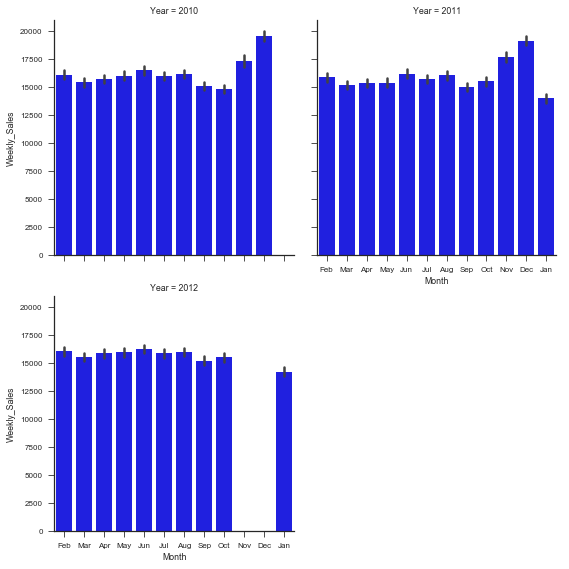

In [164]:
sns.set(context= 'paper',style= 'ticks')
#ax = sns.barplot(data=data_train, x="Month", y="Weekly_Sales",)
ax = sns.factorplot(x ="Month", col ="Year",
                   y ="Weekly_Sales", col_wrap = 2, color = 'b', kind = 'bar', data = data_train );

In [165]:
final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,1,1.0,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106
1,1,2.0,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106
2,1,3.0,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106
3,1,4.0,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106
4,1,5.0,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106


In [166]:
data_final = final.sort_values('Date', ascending=True)#
data_final

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,1,1.0,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106
330761,35,3.0,2010-02-05,14612.19,False,27.19,2.784,135.352461,9.262
330762,35,4.0,2010-02-05,26323.15,False,27.19,2.784,135.352461,9.262
330763,35,5.0,2010-02-05,36414.63,False,27.19,2.784,135.352461,9.262
330764,35,6.0,2010-02-05,11437.81,False,27.19,2.784,135.352461,9.262
...,...,...,...,...,...,...,...,...,...
128051,13,49.0,2012-10-26,7770.71,False,46.97,3.755,131.193097,5.621
128052,13,50.0,2012-10-26,1486.00,False,46.97,3.755,131.193097,5.621
128053,13,52.0,2012-10-26,4738.93,False,46.97,3.755,131.193097,5.621
390991,41,4.0,2012-10-26,32699.78,False,41.80,3.686,199.219532,6.195


In [167]:
final_store = final[final.Store == 1]
final_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10244 entries, 0 to 10243
Data columns (total 9 columns):
Store           10244 non-null int64
Dept            10244 non-null float64
Date            10244 non-null object
Weekly_Sales    10244 non-null float64
IsHoliday       10244 non-null object
Temperature     10244 non-null float64
Fuel_Price      10244 non-null float64
CPI             10244 non-null float64
Unemployment    10244 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 800.3+ KB


In [168]:
final_store = final_store[['Store', 'Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price']]
final_store.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price
0,1,2010-02-05,24924.50,42.31,2.572
1,1,2010-02-05,50605.27,42.31,2.572
2,1,2010-02-05,13740.12,42.31,2.572
3,1,2010-02-05,39954.04,42.31,2.572
4,1,2010-02-05,32229.38,42.31,2.572


In [169]:
final_temp = final_store.groupby('Temperature').Weekly_Sales.mean()
final_temp

Temperature
35.40    19591.745915
36.39    22911.318472
38.51    22804.964444
39.93    22081.755753
42.27    22628.585634
             ...     
87.96    19793.154865
88.54    20787.428143
89.94    21260.575417
90.76    21480.944930
91.65    22878.644366
Name: Weekly_Sales, Length: 143, dtype: float64

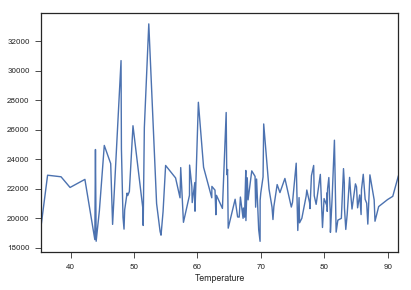

In [170]:
final_temp.plot.line(x='Temperature', y = 'Weekly_Sales')

In [171]:
final_fuel = final_store.groupby('Fuel_Price').Weekly_Sales.mean()
final_fuel

Fuel_Price
2.514    22081.755753
2.548    22804.964444
2.561    19579.549861
2.565    20936.954028
2.572    22516.313699
             ...     
3.877    21430.674225
3.891    24620.339720
3.899    21983.227123
3.906    22949.172958
3.907    19836.364861
Name: Weekly_Sales, Length: 137, dtype: float64

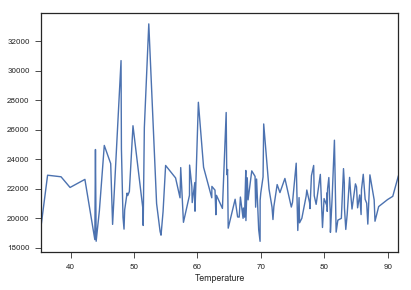

In [172]:
final_temp.plot.line(x='Fuel_Price', y = 'Weekly_Sales')

In [173]:
lm1 = smf.ols(formula='Weekly_Sales ~ Fuel_Price', data=data_final).fit()
lm1.params

Intercept     16001.284766
Fuel_Price       -5.958490
dtype: float64

In [174]:
lm = smf.ols(formula='Weekly_Sales ~ Temperature', data=data_final).fit()
lm.params


Intercept      16152.325232
Temperature       -2.846845
dtype: float64

In [749]:
print (data_final.corr())

                 Store      Dept  Weekly_Sales  Temperature  Fuel_Price  \
Store         1.000000  0.024004     -0.085195    -0.050097    0.065290   
Dept          0.024004  1.000000      0.148032     0.004437    0.003572   
Weekly_Sales -0.085195  0.148032      1.000000    -0.002312   -0.000120   
Temperature  -0.050097  0.004437     -0.002312     1.000000    0.143859   
Fuel_Price    0.065290  0.003572     -0.000120     0.143859    1.000000   
CPI          -0.211088 -0.007477     -0.020921     0.182112   -0.164210   
Unemployment  0.208552  0.007837     -0.025864     0.096730   -0.033853   

                   CPI  Unemployment  
Store        -0.211088      0.208552  
Dept         -0.007477      0.007837  
Weekly_Sales -0.020921     -0.025864  
Temperature   0.182112      0.096730  
Fuel_Price   -0.164210     -0.033853  
CPI           1.000000     -0.299953  
Unemployment -0.299953      1.000000  


In [175]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols("Weekly_Sales ~ Temperature + Fuel_Price + CPI + Unemployment + IsHoliday ", data=data_final).fit()
print (model.params)
print (model.summary())

C:\Users\parth\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Intercept            23582.026566
IsHoliday[T.True]     1264.632001
Temperature             13.774586
Fuel_Price            -383.928543
CPI                    -20.655208
Unemployment          -463.658537
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     159.3
Date:                Tue, 12 Dec 2017   Prob (F-statistic):          9.40e-170
Time:                        16:40:33   Log-Likelihood:            -4.8264e+06
No. Observations:              421570   AIC:                         9.653e+06
Df Residuals:                  421564   BIC:                         9.653e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                 

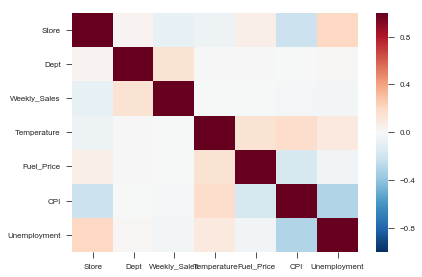

In [176]:
corr = data_final.corr()
sns.heatmap(corr)

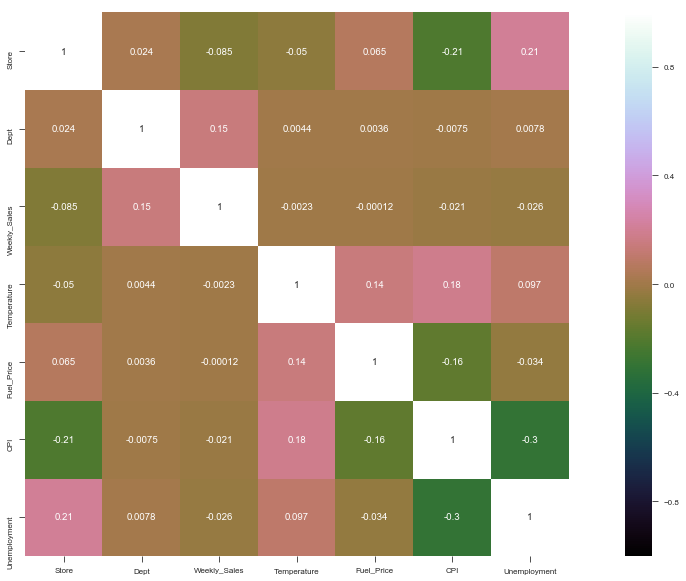

In [758]:
corr_mat=data_final.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')